#Tarea 4 - Fabián Gómez y Andrea Exarahi
La tarea comienza en el apartado Mejora en el modelo anterior (Tarea)

# Prediccion de admisiones estudiantiles con KERAS.

## Mi primera red neuronal ?

Informacion de la UCLA basada en 3 datos:

   - GRE Scores (Test)
   - GPA Scores (Grades)
   - Class rank (1-4)

El dataset original se encuentra en: http://www.ats.ucla.edu/ y en este mismo apartado corresponde al file *binary.csv* extraido directaemten del sitio.

Debe tener instalado en el ambiente de trabajo Pandas, Keras etc.

# 1. Carga y vizualizacion de datos:

Para cargar los datos usamos load the data, usaremos un paquete de datos muy util llamado Pandas. Puede leer en la documentacion de Pandas aqui: https://pandas.pydata.org/


In [0]:
import pandas as pd
data = pd.read_csv('https://stats.idre.ucla.edu/stat/data/binary.csv')
print(data)

     admit  gre   gpa  rank
0        0  380  3.61     3
1        1  660  3.67     3
2        1  800  4.00     1
3        1  640  3.19     4
4        0  520  2.93     4
5        1  760  3.00     2
6        1  560  2.98     1
7        0  400  3.08     2
8        1  540  3.39     3
9        0  700  3.92     2
10       0  800  4.00     4
11       0  440  3.22     1
12       1  760  4.00     1
13       0  700  3.08     2
14       1  700  4.00     1
15       0  480  3.44     3
16       0  780  3.87     4
17       0  360  2.56     3
18       0  800  3.75     2
19       1  540  3.81     1
20       0  500  3.17     3
21       1  660  3.63     2
22       0  600  2.82     4
23       0  680  3.19     4
24       1  760  3.35     2
25       1  800  3.66     1
26       1  620  3.61     1
27       1  520  3.74     4
28       1  780  3.22     2
29       0  520  3.29     1
..     ...  ...   ...   ...
370      1  540  3.77     2
371      1  680  3.76     3
372      1  680  2.42     1
373      1  620  3.3

### Visualizaci�n de datos:

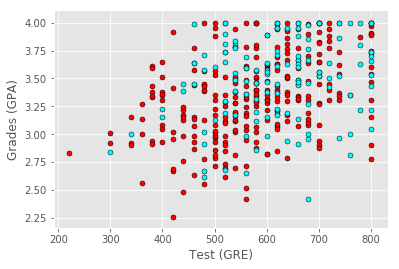

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import numpy as np
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
plot_points(data)
plt.show()

En apariencia GRADES y TEST no parecen tener relaci�n clara.

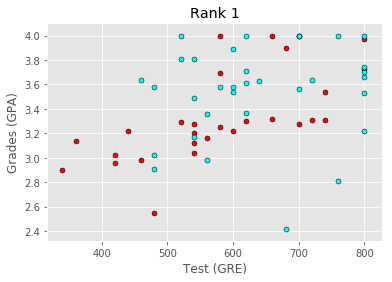

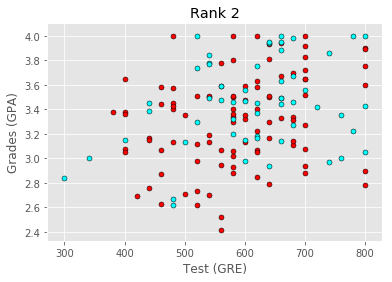

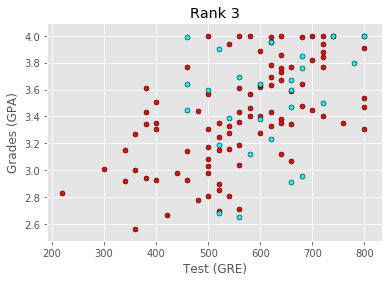

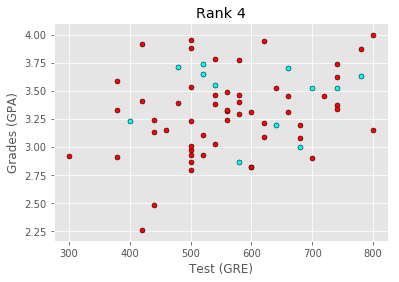

In [0]:
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

Parece ser que por RANK la relaci�n es un poco m�s clara en algunos casos, se procede a construir una MLP con RANK, GRE y GPA.

# 2. Procesado de datos:

- Se remueven NaNs
- One-hot encode con rank
- Normalizacion de GRE y GPA, de manera que queden en el rango (0,1)
- Se parten los datos en input X - labels y

In [0]:
import keras
from keras.utils import np_utils

# remove NaNs
data = data.fillna(0)

# One-hot encoding the rank
processed_data = pd.get_dummies(data, columns=['rank'])

# Normalizing the gre and the gpa scores to be in the interval (0,1)
processed_data["gre"] = processed_data["gre"]/800
processed_data["gpa"] = processed_data["gpa"]/4

# Splitting the data input into X, and the labels y 
X = np.array(processed_data)[:,1:]
X = X.astype('float32')
y = keras.utils.to_categorical(data["admit"],2)

Using TensorFlow backend.


In [0]:
# Checking that the input and output look correct
print("Shape of X:", X.shape)
print("\nShape of y:", y.shape)
print("\nFirst 10 rows of X")
print(X[:10])
print("\nFirst 10 rows of y")
print(y[:10])

Shape of X: (400, 6)

Shape of y: (400, 2)

First 10 rows of X
[[0.475  0.9025 0.     0.     1.     0.    ]
 [0.825  0.9175 0.     0.     1.     0.    ]
 [1.     1.     1.     0.     0.     0.    ]
 [0.8    0.7975 0.     0.     0.     1.    ]
 [0.65   0.7325 0.     0.     0.     1.    ]
 [0.95   0.75   0.     1.     0.     0.    ]
 [0.7    0.745  1.     0.     0.     0.    ]
 [0.5    0.77   0.     1.     0.     0.    ]
 [0.675  0.8475 0.     0.     1.     0.    ]
 [0.875  0.98   0.     1.     0.     0.    ]]

First 10 rows of y
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


# 3. Partici�n de los datos en training y testing:

In [0]:
# break training set into training and validation sets
(X_train, X_test) = X[50:], X[:50]
(y_train, y_test) = y[50:], y[:50]

# print shape of training set
print('x_train shape:', X_train.shape)

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (350, 6)
350 train samples
50 test samples


# 4. Definici�n de la arquitectura de la red neuronal:

In [0]:
# Imports
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

# Building the model

model = Sequential()

model.add(Dense(128, input_dim=6))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('sigmoid'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

W0819 02:46:02.617472 140530701350784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0819 02:46:02.676418 140530701350784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0819 02:46:02.687155 140530701350784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0819 02:46:02.741329 140530701350784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0819 02:46:02.772788 140530701350784 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               896       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
_________________________________________________________________
activation_3 (Activation)    (None, 2)                 0         
Total params: 9,282
Trainable params: 9,282
Non-trainable params: 0
_________________________________________________________________


# 5. Entrenamiento del modelo:

In [0]:
# Training the model
model.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0)
#model.fit(X_train, y_train, epochs=1000, batch_size=100, verbose=0)

W0818 23:35:56.572338 140504306931584 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0818 23:35:56.624276 140504306931584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



# 6. Score del modelo:

In [0]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

350/350 [==============================] - 0s 143us/step

 Training Accuracy: 0.7171428591864449
50/50 [==============================] - 0s 109us/step

 Testing Accuracy: 0.6799999976158142


# 7. Play with parameters!

- Activation function: relu and sigmoid
- Loss function: categorical_crossentropy, mean_squared_error
- Optimizer: rmsprop, adam, ada
- epochs? batches?



Un peque�o ejercicio agregando dropout...

In [0]:
model = Sequential()

model.add(Dense(128, input_dim=6))
model.add(Activation('tanh'))
model.add(Dropout(.3)) # now using dropout

model.add(Dense(64))
model.add(Activation('tanh'))
model.add(Dropout(.2)) # now using dropout

model.add(Dense(32))
model.add(Activation('tanh'))
model.add(Dropout(.1)) # now using dropout

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()




W0818 23:36:00.442949 140504306931584 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               896       
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_5 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
__________

In [0]:
# Training the model
#model.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0)
model.fit(X_train, y_train, epochs=500, batch_size=100, verbose=0)

In [0]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

350/350 [==============================] - 0s 235us/step

 Training Accuracy: 0.7342857139451163
50/50 [==============================] - 0s 96us/step

 Testing Accuracy: 0.6799999976158142


## Mejora en el modelo anterior (Tarea)...

Vamos el modelo base definido por el profe y buscar la mejor combinación para los siguientes hyper parametros:


1.   Activation Function : vamos a ultilizar permutaciones para tomar la mejor combinación de los más populares funciones (sigmoid,tanh,relu). 
2.   Loss Function : para este caso vamos a utilizar los más populares para neural network (Categorical Crossentropy,Mean Squared Error)
3.   Optimisation Functions: para este caso nos vamos a enfocar en los siguientes RMSprop, Adagrad y Adam.

Sabemos que existen muchos más algoritmos y otras formas de poder mejorar el accuracy del problema como : Número de  epochs, learning rate, drop out,  cantidad de capas, ect. Sin embargo nos vamos a enfocar en los mencionados anteriormente para tomar conclusiones basados en nuestro problema.


Por lo que se hará las siguientes combinaciones:



1.   Permutación Activation Function + Categorical Crossentropy + RMSprop
2.   Permutación Activation Function + Categorical Crossentropy + Adam
3.   Permutación Activation Function + Mean Squared Error + RMSprop
4.   Permutación Activation Function + Mean Squared Error + Adam
5.   Permutación Activation Function + Categorical Crossentropy + Adagrad
6.   Permutación Activation Function +  Mean Squared Error + Adagrad




In [0]:
from itertools import permutations 
import itertools

#vActivationAlgorithms = ['linear','exponential','hard_sigmoid','sigmoid','tanh','relu','softsign','softplus','selu','elu','softmax']

#Popular Activation Functions
vActivationAlgorithms = ['sigmoid','tanh','relu']

vPermutationsAlgorithms = [p for p in itertools.product(vActivationAlgorithms, repeat=4)]
vMax = -1

## 1. Permutación Activation Function + Categorical Crossentropy + RMSprop

50/50 [==============================] - 0s 186us/step
T1:sigmoid-sigmoid-sigmoid-sigmoid
T2:sigmoid-sigmoid-sigmoid-tanh
T3:sigmoid-sigmoid-sigmoid-relu
T4:sigmoid-sigmoid-tanh-sigmoid
T5:sigmoid-sigmoid-tanh-tanh
T6:sigmoid-sigmoid-tanh-relu
T7:sigmoid-sigmoid-relu-sigmoid
T8:sigmoid-sigmoid-relu-tanh
T9:sigmoid-sigmoid-relu-relu
T10:sigmoid-tanh-sigmoid-sigmoid
T11:sigmoid-tanh-sigmoid-tanh
T12:sigmoid-tanh-sigmoid-relu
T13:sigmoid-tanh-tanh-sigmoid
T14:sigmoid-tanh-tanh-tanh
T15:sigmoid-tanh-tanh-relu
T16:sigmoid-tanh-relu-sigmoid
T17:sigmoid-tanh-relu-tanh
T18:sigmoid-tanh-relu-relu
T19:sigmoid-relu-sigmoid-sigmoid
T20:sigmoid-relu-sigmoid-tanh
T21:sigmoid-relu-sigmoid-relu
T22:sigmoid-relu-tanh-sigmoid
T23:sigmoid-relu-tanh-tanh
T24:sigmoid-relu-tanh-relu
T25:sigmoid-relu-relu-sigmoid
T26:sigmoid-relu-relu-tanh
T27:sigmoid-relu-relu-relu
T28:tanh-sigmoid-sigmoid-sigmoid
T29:tanh-sigmoid-sigmoid-tanh
T30:tanh-sigmoid-sigmoid-relu
T31:tanh-sigmoid-tanh-sigmoid
T32:tanh-sigmoid-tanh

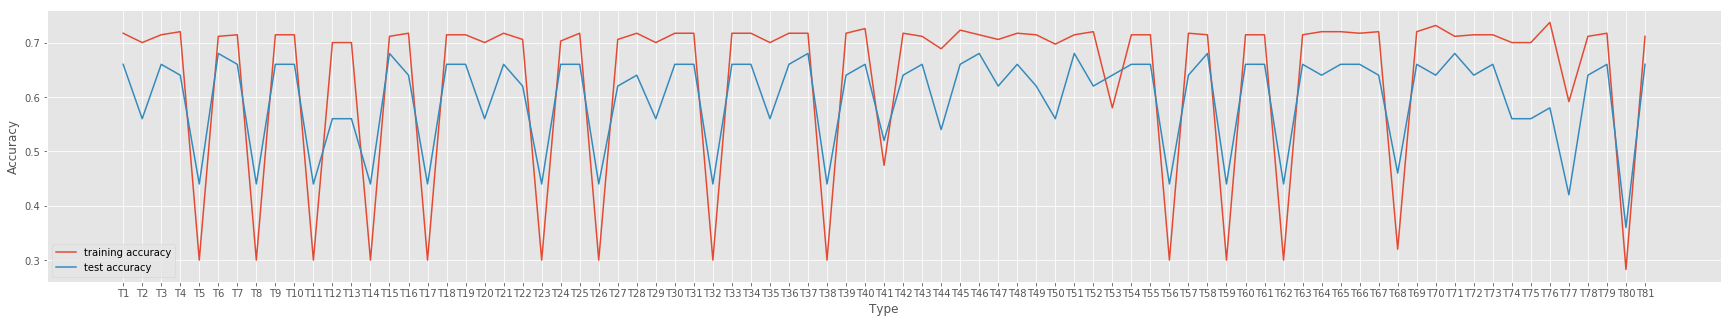

In [0]:
vCont = 0


vTraining_Accuracy = []
vTest_Accuracy = []
vPermutationCriteria = []
vTypeCriteria = []

for vPermutation in vPermutationsAlgorithms:
    if vCont == vMax:
      break
    vCont = vCont +1
    model = Sequential()
    model.add(Dense(128, input_dim=6))
    model.add(Activation(vPermutation[0]))
    model.add(Dropout(.3)) # now using dropout

    model.add(Dense(64))
    model.add(Activation(vPermutation[1]))
    model.add(Dropout(.2)) # now using dropout

    model.add(Dense(32))
    model.add(Activation(vPermutation[2]))
    model.add(Dropout(.1)) # now using dropout

    model.add(Dense(2))
    model.add(Activation(vPermutation[3]))

    model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    
    
    model.fit(X_train, y_train, epochs=500, batch_size=100, verbose=0)
    
    score = model.evaluate(X_train, y_train)
    vTraining_Accuracy.append(score[1])
    score = model.evaluate(X_test, y_test)
    vTest_Accuracy.append(score[1])
    
    vTypeCriteria.append('T'+str(vCont))
    vPermutationCriteria.append('T'+str(vCont)+':'+"-".join(str(x) for x in vPermutation))
    
plt.style.use('ggplot')
%matplotlib inline
fig = plt.figure(figsize=(30, 5))

plt.plot(vTypeCriteria, vTraining_Accuracy, label="training accuracy")
plt.plot(vTypeCriteria, vTest_Accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Type")
plt.legend()

for vPerm in vPermutationCriteria:
    print(vPerm)

###1.1 Top Ten Types (training accuracy vs test accuracy ) 

*   T6 : sigmoid-sigmoid-tanh-relu
*   T10 : sigmoid-tanh-sigmoid-sigmoid
*   T15 : sigmoid-tanh-tanh-relu
*   T18 : sigmoid-tanh-relu-relu
*   T37 : tanh-tanh-sigmoid-sigmoid
*   T51 : tanh-relu-tanh-relu
*   T58 : relu-sigmoid-tanh-sigmoid
*   T67 : relu-tanh-tanh-sigmoid
*   T69 : relu-tanh-tanh-relu
*   T71 : relu-tanh-relu-tanh

##2. Permutación Activation Function + Categorical Crossentropy + Adam

50/50 [==============================] - 0s 269us/step
T1:sigmoid-sigmoid-sigmoid-sigmoid
T2:sigmoid-sigmoid-sigmoid-tanh
T3:sigmoid-sigmoid-sigmoid-relu
T4:sigmoid-sigmoid-tanh-sigmoid
T5:sigmoid-sigmoid-tanh-tanh
T6:sigmoid-sigmoid-tanh-relu
T7:sigmoid-sigmoid-relu-sigmoid
T8:sigmoid-sigmoid-relu-tanh
T9:sigmoid-sigmoid-relu-relu
T10:sigmoid-tanh-sigmoid-sigmoid
T11:sigmoid-tanh-sigmoid-tanh
T12:sigmoid-tanh-sigmoid-relu
T13:sigmoid-tanh-tanh-sigmoid
T14:sigmoid-tanh-tanh-tanh
T15:sigmoid-tanh-tanh-relu
T16:sigmoid-tanh-relu-sigmoid
T17:sigmoid-tanh-relu-tanh
T18:sigmoid-tanh-relu-relu
T19:sigmoid-relu-sigmoid-sigmoid
T20:sigmoid-relu-sigmoid-tanh
T21:sigmoid-relu-sigmoid-relu
T22:sigmoid-relu-tanh-sigmoid
T23:sigmoid-relu-tanh-tanh
T24:sigmoid-relu-tanh-relu
T25:sigmoid-relu-relu-sigmoid
T26:sigmoid-relu-relu-tanh
T27:sigmoid-relu-relu-relu
T28:tanh-sigmoid-sigmoid-sigmoid
T29:tanh-sigmoid-sigmoid-tanh
T30:tanh-sigmoid-sigmoid-relu
T31:tanh-sigmoid-tanh-sigmoid
T32:tanh-sigmoid-tanh

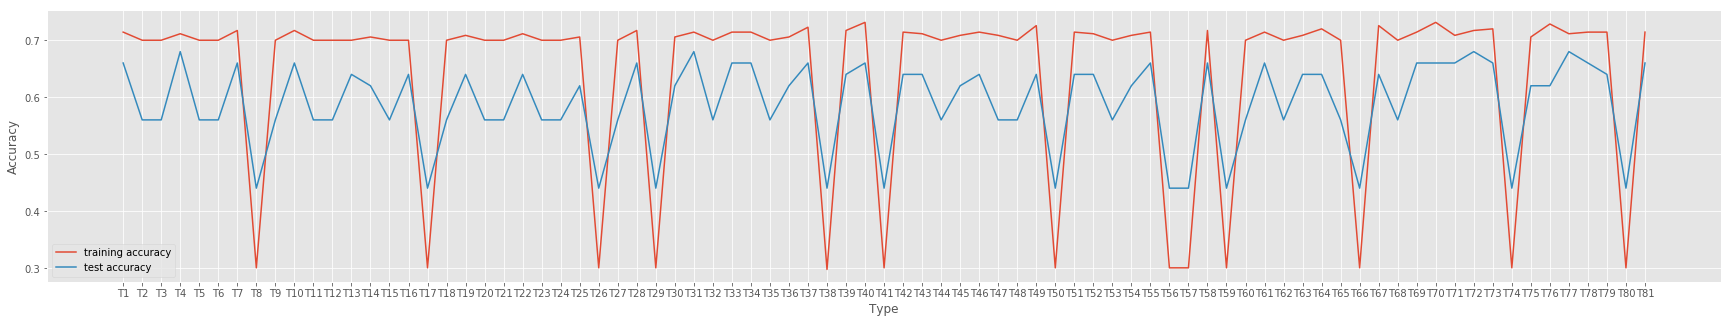

In [0]:
vCont = 0
vLossFunctionName = 'categorical_crossentropy'
vOptimizerFunctionName = 'adam'

vTraining_Accuracy = []
vTest_Accuracy = []
vPermutationCriteria = []
vTypeCriteria = []

for vPermutation in vPermutationsAlgorithms:
    if vCont == vMax:
      break
    vCont = vCont +1
    model = Sequential()
    model.add(Dense(128, input_dim=6))
    model.add(Activation(vPermutation[0]))
    model.add(Dropout(.3)) # now using dropout

    model.add(Dense(64))
    model.add(Activation(vPermutation[1]))
    model.add(Dropout(.2)) # now using dropout

    model.add(Dense(32))
    model.add(Activation(vPermutation[2]))
    model.add(Dropout(.1)) # now using dropout

    model.add(Dense(2))
    model.add(Activation(vPermutation[3]))

    model.compile(loss = vLossFunctionName, optimizer=vOptimizerFunctionName, metrics=['accuracy'])
    
    
    model.fit(X_train, y_train, epochs=500, batch_size=100, verbose=0)
    
    score = model.evaluate(X_train, y_train)
    vTraining_Accuracy.append(score[1])
    score = model.evaluate(X_test, y_test)
    vTest_Accuracy.append(score[1])
    
    vTypeCriteria.append('T'+str(vCont))
    vPermutationCriteria.append('T'+str(vCont)+':'+"-".join(str(x) for x in vPermutation))
    
plt.style.use('ggplot')
%matplotlib inline
fig = plt.figure(figsize=(30, 5))

plt.plot(vTypeCriteria, vTraining_Accuracy, label="training accuracy")
plt.plot(vTypeCriteria, vTest_Accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Type")
plt.legend()

for vPerm in vPermutationCriteria:
    print(vPerm)

###2.1 Top Ten Types (training accuracy vs test accuracy ) 

*   T4 : sigmoid-sigmoid-tanh-sigmoid
*   T10 : sigmoid-tanh-sigmoid-sigmoid
*   T16 : sigmoid-tanh-relu-sigmoid
*   T28 : tanh-sigmoid-sigmoid-sigmoid
*   T31 : tanh-sigmoid-tanh-sigmoid
*   T55 : relu-sigmoid-sigmoid-sigmoid
*   T58 : relu-sigmoid-tanh-sigmoid
*   T72 : relu-tanh-relu-relu
*   T73 : relu-relu-sigmoid-sigmoid
*   T77 : relu-relu-tanh-tanh


##3. Permutación Activation Function + Mean Squared Error + RMSprop

50/50 [==============================] - 0s 249us/step
T1:sigmoid-sigmoid-sigmoid-sigmoid
T2:sigmoid-sigmoid-sigmoid-tanh
T3:sigmoid-sigmoid-sigmoid-relu
T4:sigmoid-sigmoid-tanh-sigmoid
T5:sigmoid-sigmoid-tanh-tanh
T6:sigmoid-sigmoid-tanh-relu
T7:sigmoid-sigmoid-relu-sigmoid
T8:sigmoid-sigmoid-relu-tanh
T9:sigmoid-sigmoid-relu-relu
T10:sigmoid-tanh-sigmoid-sigmoid
T11:sigmoid-tanh-sigmoid-tanh
T12:sigmoid-tanh-sigmoid-relu
T13:sigmoid-tanh-tanh-sigmoid
T14:sigmoid-tanh-tanh-tanh
T15:sigmoid-tanh-tanh-relu
T16:sigmoid-tanh-relu-sigmoid
T17:sigmoid-tanh-relu-tanh
T18:sigmoid-tanh-relu-relu
T19:sigmoid-relu-sigmoid-sigmoid
T20:sigmoid-relu-sigmoid-tanh
T21:sigmoid-relu-sigmoid-relu
T22:sigmoid-relu-tanh-sigmoid
T23:sigmoid-relu-tanh-tanh
T24:sigmoid-relu-tanh-relu
T25:sigmoid-relu-relu-sigmoid
T26:sigmoid-relu-relu-tanh
T27:sigmoid-relu-relu-relu
T28:tanh-sigmoid-sigmoid-sigmoid
T29:tanh-sigmoid-sigmoid-tanh
T30:tanh-sigmoid-sigmoid-relu
T31:tanh-sigmoid-tanh-sigmoid
T32:tanh-sigmoid-tanh

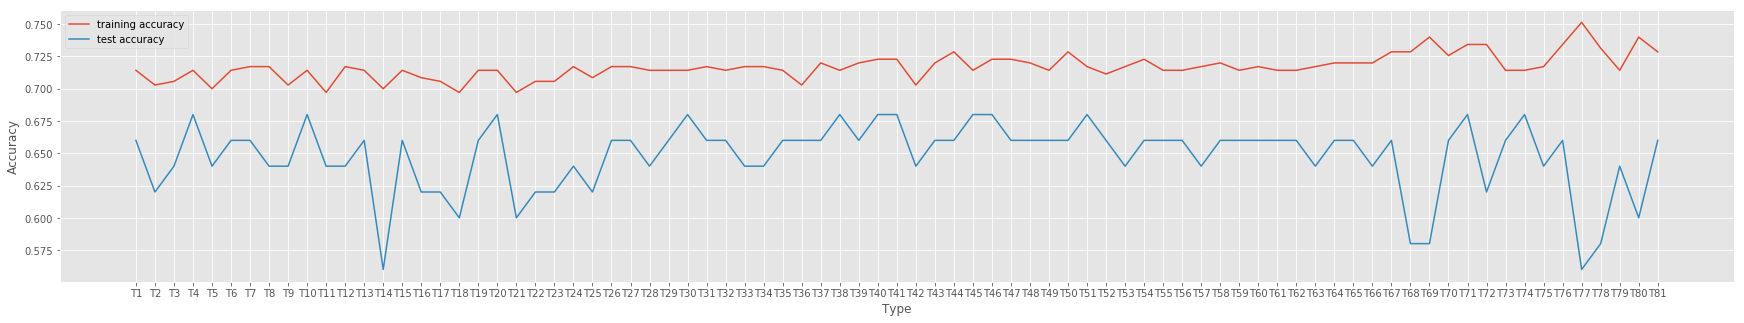

In [0]:
vCont = 0
vLossFunctionName = 'mean_squared_error'
vOptimizerFunctionName = 'rmsprop'

vTraining_Accuracy = []
vTest_Accuracy = []
vPermutationCriteria = []
vTypeCriteria = []

for vPermutation in vPermutationsAlgorithms:
    if vCont == vMax:
      break
    vCont = vCont +1
    model = Sequential()
    model.add(Dense(128, input_dim=6))
    model.add(Activation(vPermutation[0]))
    model.add(Dropout(.3)) # now using dropout

    model.add(Dense(64))
    model.add(Activation(vPermutation[1]))
    model.add(Dropout(.2)) # now using dropout

    model.add(Dense(32))
    model.add(Activation(vPermutation[2]))
    model.add(Dropout(.1)) # now using dropout

    model.add(Dense(2))
    model.add(Activation(vPermutation[3]))

    model.compile(loss = vLossFunctionName, optimizer=vOptimizerFunctionName, metrics=['accuracy'])
    
    
    model.fit(X_train, y_train, epochs=500, batch_size=100, verbose=0)
    
    score = model.evaluate(X_train, y_train)
    vTraining_Accuracy.append(score[1])
    score = model.evaluate(X_test, y_test)
    vTest_Accuracy.append(score[1])
    
    vTypeCriteria.append('T'+str(vCont))
    vPermutationCriteria.append('T'+str(vCont)+':'+"-".join(str(x) for x in vPermutation))
    
plt.style.use('ggplot')
%matplotlib inline
fig = plt.figure(figsize=(30, 5))

plt.plot(vTypeCriteria, vTraining_Accuracy, label="training accuracy")
plt.plot(vTypeCriteria, vTest_Accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Type")
plt.legend()

for vPerm in vPermutationCriteria:
    print(vPerm)

###3.1 Top Ten Types (training accuracy vs test accuracy ) 

* T4 : sigmoid-sigmoid-tanh-sigmoid
* T10 : sigmoid-tanh-sigmoid-sigmoid
* T20 : sigmoid-relu-sigmoid-tanh
* T30 : tanh-sigmoid-sigmoid-relu
* T41 : tanh-tanh-tanh-tanh
* T42 : tanh-tanh-tanh-relu
* T45 : tanh-tanh-relu-relu
* T46 : tanh-relu-sigmoid-sigmoid
* T51 : tanh-relu-tanh-relu
* T54 : tanh-relu-relu-relu

##4. Permutación Activation Function + Mean Squared Error + Adam


50/50 [==============================] - 0s 318us/step
T1:sigmoid-sigmoid-sigmoid-sigmoid
T2:sigmoid-sigmoid-sigmoid-tanh
T3:sigmoid-sigmoid-sigmoid-relu
T4:sigmoid-sigmoid-tanh-sigmoid
T5:sigmoid-sigmoid-tanh-tanh
T6:sigmoid-sigmoid-tanh-relu
T7:sigmoid-sigmoid-relu-sigmoid
T8:sigmoid-sigmoid-relu-tanh
T9:sigmoid-sigmoid-relu-relu
T10:sigmoid-tanh-sigmoid-sigmoid
T11:sigmoid-tanh-sigmoid-tanh
T12:sigmoid-tanh-sigmoid-relu
T13:sigmoid-tanh-tanh-sigmoid
T14:sigmoid-tanh-tanh-tanh
T15:sigmoid-tanh-tanh-relu
T16:sigmoid-tanh-relu-sigmoid
T17:sigmoid-tanh-relu-tanh
T18:sigmoid-tanh-relu-relu
T19:sigmoid-relu-sigmoid-sigmoid
T20:sigmoid-relu-sigmoid-tanh
T21:sigmoid-relu-sigmoid-relu
T22:sigmoid-relu-tanh-sigmoid
T23:sigmoid-relu-tanh-tanh
T24:sigmoid-relu-tanh-relu
T25:sigmoid-relu-relu-sigmoid
T26:sigmoid-relu-relu-tanh
T27:sigmoid-relu-relu-relu
T28:tanh-sigmoid-sigmoid-sigmoid
T29:tanh-sigmoid-sigmoid-tanh
T30:tanh-sigmoid-sigmoid-relu
T31:tanh-sigmoid-tanh-sigmoid
T32:tanh-sigmoid-tanh

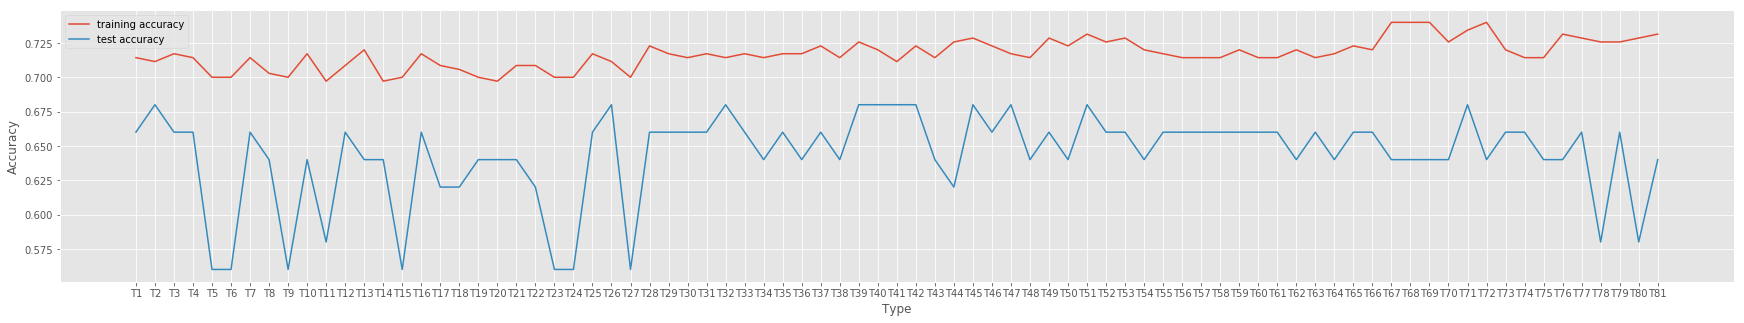

In [0]:
vCont = 0
vLossFunctionName = 'mean_squared_error'
vOptimizerFunctionName = 'adam'

vTraining_Accuracy = []
vTest_Accuracy = []
vPermutationCriteria = []
vTypeCriteria = []

for vPermutation in vPermutationsAlgorithms:
    if vCont == vMax:
      break
    vCont = vCont +1
    model = Sequential()
    model.add(Dense(128, input_dim=6))
    model.add(Activation(vPermutation[0]))
    model.add(Dropout(.3)) # now using dropout

    model.add(Dense(64))
    model.add(Activation(vPermutation[1]))
    model.add(Dropout(.2)) # now using dropout

    model.add(Dense(32))
    model.add(Activation(vPermutation[2]))
    model.add(Dropout(.1)) # now using dropout

    model.add(Dense(2))
    model.add(Activation(vPermutation[3]))

    model.compile(loss = vLossFunctionName, optimizer=vOptimizerFunctionName, metrics=['accuracy'])
    
    
    model.fit(X_train, y_train, epochs=500, batch_size=100, verbose=0)
    
    score = model.evaluate(X_train, y_train)
    vTraining_Accuracy.append(score[1])
    score = model.evaluate(X_test, y_test)
    vTest_Accuracy.append(score[1])
    
    vTypeCriteria.append('T'+str(vCont))
    vPermutationCriteria.append('T'+str(vCont)+':'+"-".join(str(x) for x in vPermutation))
    
plt.style.use('ggplot')
%matplotlib inline
fig = plt.figure(figsize=(30, 5))

plt.plot(vTypeCriteria, vTraining_Accuracy, label="training accuracy")
plt.plot(vTypeCriteria, vTest_Accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Type")
plt.legend()

for vPerm in vPermutationCriteria:
    print(vPerm)

###4.1 Top Ten Types (training accuracy vs test accuracy ) 

* T2 : sigmoid-sigmoid-sigmoid-tanh
* T7 : sigmoid-sigmoid-relu-sigmoid
* T12 : sigmoid-tanh-sigmoid-relu
* T16 : sigmoid-tanh-relu-sigmoid
* T26 : sigmoid-relu-relu-tanh
* T32 : tanh-sigmoid-tanh-tanh
* T39 : tanh-tanh-sigmoid-relu
* T42 : tanh-tanh-tanh-relu
* T45 : tanh-tanh-relu-relu
* T51 : tanh-relu-tanh-relu

##5. Permutación Activation Function + Categorical Crossentropy + Adagrad


W0819 02:46:27.807507 140530701350784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0819 02:46:27.817186 140530701350784 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0819 02:46:28.062394 140530701350784 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule 

50/50 [==============================] - 0s 125us/step
T1:sigmoid-sigmoid-sigmoid-sigmoid
T2:sigmoid-sigmoid-sigmoid-tanh
T3:sigmoid-sigmoid-sigmoid-relu
T4:sigmoid-sigmoid-tanh-sigmoid
T5:sigmoid-sigmoid-tanh-tanh
T6:sigmoid-sigmoid-tanh-relu
T7:sigmoid-sigmoid-relu-sigmoid
T8:sigmoid-sigmoid-relu-tanh
T9:sigmoid-sigmoid-relu-relu
T10:sigmoid-tanh-sigmoid-sigmoid
T11:sigmoid-tanh-sigmoid-tanh
T12:sigmoid-tanh-sigmoid-relu
T13:sigmoid-tanh-tanh-sigmoid
T14:sigmoid-tanh-tanh-tanh
T15:sigmoid-tanh-tanh-relu
T16:sigmoid-tanh-relu-sigmoid
T17:sigmoid-tanh-relu-tanh
T18:sigmoid-tanh-relu-relu
T19:sigmoid-relu-sigmoid-sigmoid
T20:sigmoid-relu-sigmoid-tanh
T21:sigmoid-relu-sigmoid-relu
T22:sigmoid-relu-tanh-sigmoid
T23:sigmoid-relu-tanh-tanh
T24:sigmoid-relu-tanh-relu
T25:sigmoid-relu-relu-sigmoid
T26:sigmoid-relu-relu-tanh
T27:sigmoid-relu-relu-relu
T28:tanh-sigmoid-sigmoid-sigmoid
T29:tanh-sigmoid-sigmoid-tanh
T30:tanh-sigmoid-sigmoid-relu
T31:tanh-sigmoid-tanh-sigmoid
T32:tanh-sigmoid-tanh

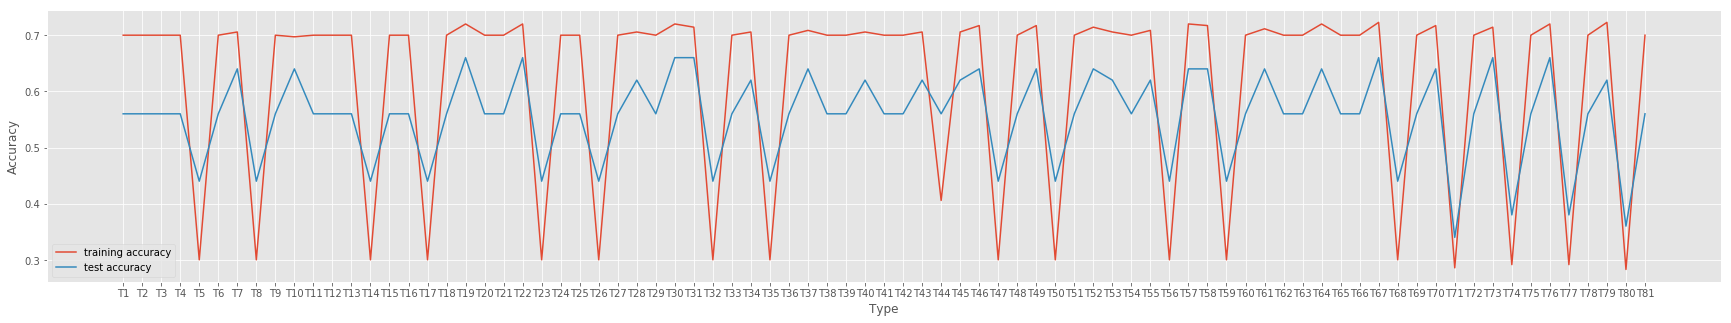

In [0]:
vCont = 0
vLossFunctionName = 'categorical_crossentropy'
vOptimizerFunctionName = 'adagrad'

vTraining_Accuracy = []
vTest_Accuracy = []
vPermutationCriteria = []
vTypeCriteria = []

for vPermutation in vPermutationsAlgorithms:
    if vCont == vMax:
      break
    vCont = vCont +1
    model = Sequential()
    model.add(Dense(128, input_dim=6))
    model.add(Activation(vPermutation[0]))
    model.add(Dropout(.3)) # now using dropout

    model.add(Dense(64))
    model.add(Activation(vPermutation[1]))
    model.add(Dropout(.2)) # now using dropout

    model.add(Dense(32))
    model.add(Activation(vPermutation[2]))
    model.add(Dropout(.1)) # now using dropout

    model.add(Dense(2))
    model.add(Activation(vPermutation[3]))

    model.compile(loss = vLossFunctionName, optimizer=vOptimizerFunctionName, metrics=['accuracy'])
    
    
    model.fit(X_train, y_train, epochs=500, batch_size=100, verbose=0)
    
    score = model.evaluate(X_train, y_train)
    vTraining_Accuracy.append(score[1])
    score = model.evaluate(X_test, y_test)
    vTest_Accuracy.append(score[1])
    
    vTypeCriteria.append('T'+str(vCont))
    vPermutationCriteria.append('T'+str(vCont)+':'+"-".join(str(x) for x in vPermutation))
    
plt.style.use('ggplot')
%matplotlib inline
fig = plt.figure(figsize=(30, 5))

plt.plot(vTypeCriteria, vTraining_Accuracy, label="training accuracy")
plt.plot(vTypeCriteria, vTest_Accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Type")
plt.legend()

for vPerm in vPermutationCriteria:
    print(vPerm)

###5.1 Top Ten Types (training accuracy vs test accuracy ) 

*   T9   :  sigmoid-sigmoid-relu-relu
*   T19 : sigmoid-relu-sigmoid-sigmoid
*   T22 : sigmoid-relu-tanh-sigmoid
*   T30 : tanh-sigmoid-sigmoid-relu
*   T31 : tanh-sigmoid-tanh-sigmoid
*   T36 : tanh-sigmoid-relu-relu
*   T46 : tanh-relu-sigmoid-sigmoid
*   T67 : relu-tanh-tanh-sigmoid
*   T70 : relu-tanh-relu-sigmoid
*   T73 : relu-relu-sigmoid-sigmoid

## 6.Permutación Activation Function + Mean Squared Error + Adagrad

50/50 [==============================] - 0s 154us/step
T1:sigmoid-sigmoid-sigmoid-sigmoid
T2:sigmoid-sigmoid-sigmoid-tanh
T3:sigmoid-sigmoid-sigmoid-relu
T4:sigmoid-sigmoid-tanh-sigmoid
T5:sigmoid-sigmoid-tanh-tanh
T6:sigmoid-sigmoid-tanh-relu
T7:sigmoid-sigmoid-relu-sigmoid
T8:sigmoid-sigmoid-relu-tanh
T9:sigmoid-sigmoid-relu-relu
T10:sigmoid-tanh-sigmoid-sigmoid
T11:sigmoid-tanh-sigmoid-tanh
T12:sigmoid-tanh-sigmoid-relu
T13:sigmoid-tanh-tanh-sigmoid
T14:sigmoid-tanh-tanh-tanh
T15:sigmoid-tanh-tanh-relu
T16:sigmoid-tanh-relu-sigmoid
T17:sigmoid-tanh-relu-tanh
T18:sigmoid-tanh-relu-relu
T19:sigmoid-relu-sigmoid-sigmoid
T20:sigmoid-relu-sigmoid-tanh
T21:sigmoid-relu-sigmoid-relu
T22:sigmoid-relu-tanh-sigmoid
T23:sigmoid-relu-tanh-tanh
T24:sigmoid-relu-tanh-relu
T25:sigmoid-relu-relu-sigmoid
T26:sigmoid-relu-relu-tanh
T27:sigmoid-relu-relu-relu
T28:tanh-sigmoid-sigmoid-sigmoid
T29:tanh-sigmoid-sigmoid-tanh
T30:tanh-sigmoid-sigmoid-relu
T31:tanh-sigmoid-tanh-sigmoid
T32:tanh-sigmoid-tanh

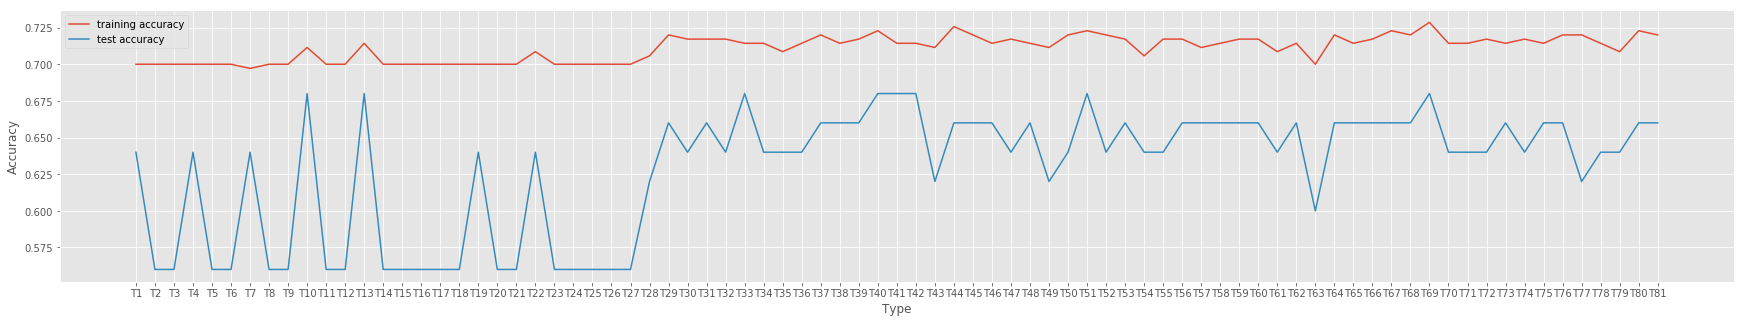

In [0]:
vCont = 0
vLossFunctionName = 'mean_squared_error'
vOptimizerFunctionName = 'adagrad'

vTraining_Accuracy = []
vTest_Accuracy = []
vPermutationCriteria = []
vTypeCriteria = []

for vPermutation in vPermutationsAlgorithms:
    if vCont == vMax:
      break
    vCont = vCont +1
    model = Sequential()
    model.add(Dense(128, input_dim=6))
    model.add(Activation(vPermutation[0]))
    model.add(Dropout(.3)) # now using dropout

    model.add(Dense(64))
    model.add(Activation(vPermutation[1]))
    model.add(Dropout(.2)) # now using dropout

    model.add(Dense(32))
    model.add(Activation(vPermutation[2]))
    model.add(Dropout(.1)) # now using dropout

    model.add(Dense(2))
    model.add(Activation(vPermutation[3]))

    model.compile(loss = vLossFunctionName, optimizer=vOptimizerFunctionName, metrics=['accuracy'])
    
    
    model.fit(X_train, y_train, epochs=500, batch_size=100, verbose=0)
    
    score = model.evaluate(X_train, y_train)
    vTraining_Accuracy.append(score[1])
    score = model.evaluate(X_test, y_test)
    vTest_Accuracy.append(score[1])
    
    vTypeCriteria.append('T'+str(vCont))
    vPermutationCriteria.append('T'+str(vCont)+':'+"-".join(str(x) for x in vPermutation))
    
plt.style.use('ggplot')
%matplotlib inline
fig = plt.figure(figsize=(30, 5))

plt.plot(vTypeCriteria, vTraining_Accuracy, label="training accuracy")
plt.plot(vTypeCriteria, vTest_Accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Type")
plt.legend()

for vPerm in vPermutationCriteria:
    print(vPerm)

###6.1 Top Ten Types (training accuracy vs test accuracy ) 

*   T10   :  sigmoid-tanh-sigmoid-sigmoid
*   T13 : sigmoid-tanh-tanh-sigmoid
*   T33 : tanh-sigmoid-tanh-relu
*   T40 : tanh-tanh-tanh-sigmoid
*   T41 : tanh-tanh-tanh-tanh
*   T42 : tanh-tanh-tanh-relu
*   T51 : tanh-relu-tanh-relu
*   T62 : relu-sigmoid-relu-tanh
*   T69 : relu-tanh-relu-sigmoid
*   T76 : relu-relu-tanh-sigmoid

##Resultados

Al parecer los datos que estan más cercanos entre el accuaracy del Test y Training corresponde a los resultados de **Activation Function + Categorical Crossentropy + Adam** , mientrás que los que presentan los mejores resultados **Permutación Activation Function + Categorical Crossentropy + Adagrad** y los peores resultados : **Permutación Activation Function + Mean Squared Error + Adagrad**

Pendiente:
1.  Un analisis más especifico de que tuvo mejores resultados según algoritmos.
2.  Evaluar diferentes maneras de mejorar la red neuronal como; epochs, steps, cantidad de layers, dropOut, etc.